In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Hotel Data Cleaning/Data/hotel_bookings.csv')

In [5]:
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nLast 5 Rows:\n", df.tail())
print("\nBasic Statistics:\n", df.describe())

Dataset Shape: (119390, 32)

Column Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type               

In [11]:
print("Missing Values Summary:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)
print(missing_summary[missing_summary['Missing_Count'] > 0])

Missing Values Summary:
          Missing_Count  Missing_Percentage
company          112593           94.306893
agent             16340           13.686238
country             488            0.408744
children              4            0.003350


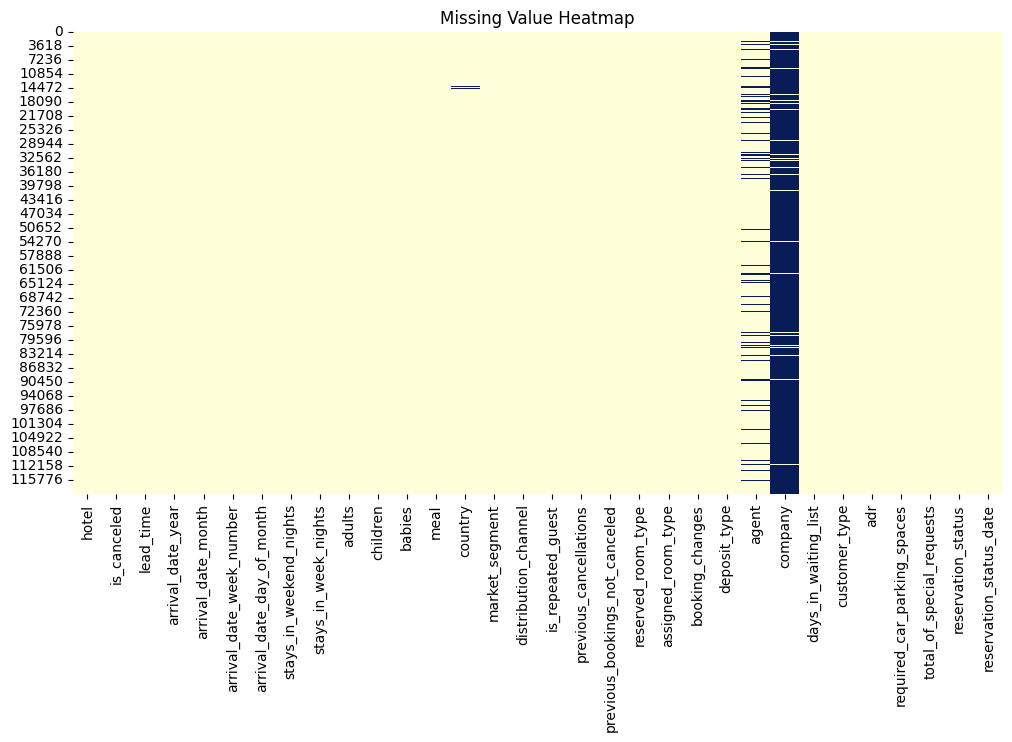

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Value Heatmap")
plt.show()

In [15]:
duplicates = df.duplicated()
print(f"Number of exact duplicates: {duplicates.sum()}")

df[duplicates].head()

Number of exact duplicates: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08


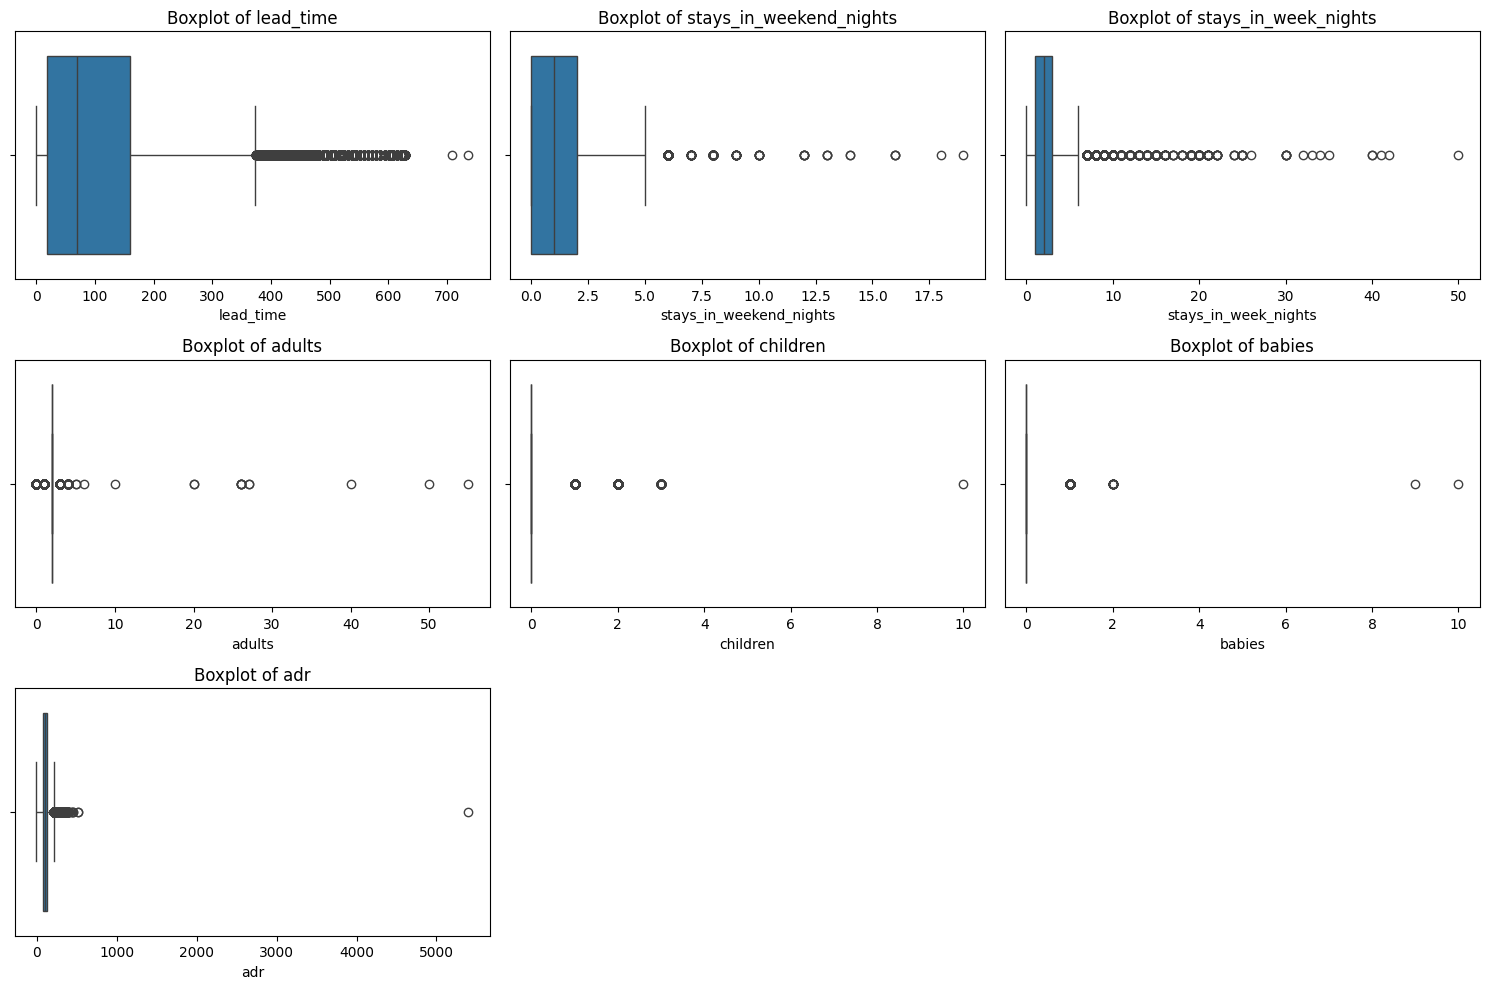

In [16]:
num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'adr']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [17]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nUnique values in '{col}':\n{df[col].unique()}")


Unique values in 'hotel':
['Resort Hotel' 'City Hotel']

Unique values in 'arrival_date_month':
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Unique values in 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']

Unique values in 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI

In [18]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
zero_guests = df[df['total_guests'] == 0]
print(f"Rows with zero guests: {len(zero_guests)}")
zero_guests.head()

Rows with zero guests: 180


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,NaN,174.0,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06,0.0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,NaN,174.0,0,Transient,0.0,0,0,Check-Out,2015-10-12,0.0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,38.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23,0.0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04,0.0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05,0.0


In [19]:
df['children'].fillna(0, inplace=True)

/tmp/ipython-input-19-289084130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


In [20]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

/tmp/ipython-input-20-2863300244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


In [21]:
df['agent'].fillna(0, inplace=True)

/tmp/ipython-input-21-2085200365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)


In [22]:
df['company'].fillna(0, inplace=True)

/tmp/ipython-input-22-48701503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna(0, inplace=True)


In [23]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [24]:
duplicates = df.duplicated()
print(f"Number of exact duplicate rows: {duplicates.sum()}")

df[duplicates].head()

Number of exact duplicate rows: 32013


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07,2.0
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07,2.0
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01,2.0
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08,1.0


In [25]:
df = df.drop_duplicates()


print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (87377, 33)


In [26]:
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Example for 'adr'
detect_outliers_iqr('adr')

adr: 2488 outliers


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
396,Resort Hotel,0,317,2015,July,29,14,1,5,2,...,240.0,0.0,0,Transient,230.67,1,2,Check-Out,2015-07-20,4.0
523,Resort Hotel,0,0,2015,July,29,18,0,1,2,...,0.0,0.0,0,Transient,249.00,0,0,Check-Out,2015-07-19,4.0
526,Resort Hotel,0,73,2015,July,29,18,2,5,2,...,0.0,0.0,0,Transient,241.50,0,2,Check-Out,2015-07-25,3.0
584,Resort Hotel,1,28,2015,July,30,20,2,5,2,...,0.0,0.0,0,Transient,240.64,0,0,Canceled,2015-07-20,3.0
641,Resort Hotel,1,22,2015,July,30,24,0,2,2,...,240.0,0.0,0,Transient,233.00,0,2,Canceled,2015-07-14,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119152,City Hotel,0,29,2017,August,35,27,2,1,2,...,9.0,0.0,0,Transient,233.00,0,0,Check-Out,2017-08-30,4.0
119247,City Hotel,0,140,2017,August,35,27,2,3,2,...,9.0,0.0,0,Transient,235.00,0,0,Check-Out,2017-09-01,4.0
119289,City Hotel,0,25,2017,August,35,30,0,3,3,...,9.0,0.0,0,Transient,236.33,0,3,Check-Out,2017-09-02,3.0
119339,City Hotel,0,110,2017,August,35,29,0,5,3,...,14.0,0.0,0,Transient,229.00,0,1,Check-Out,2017-09-03,3.0


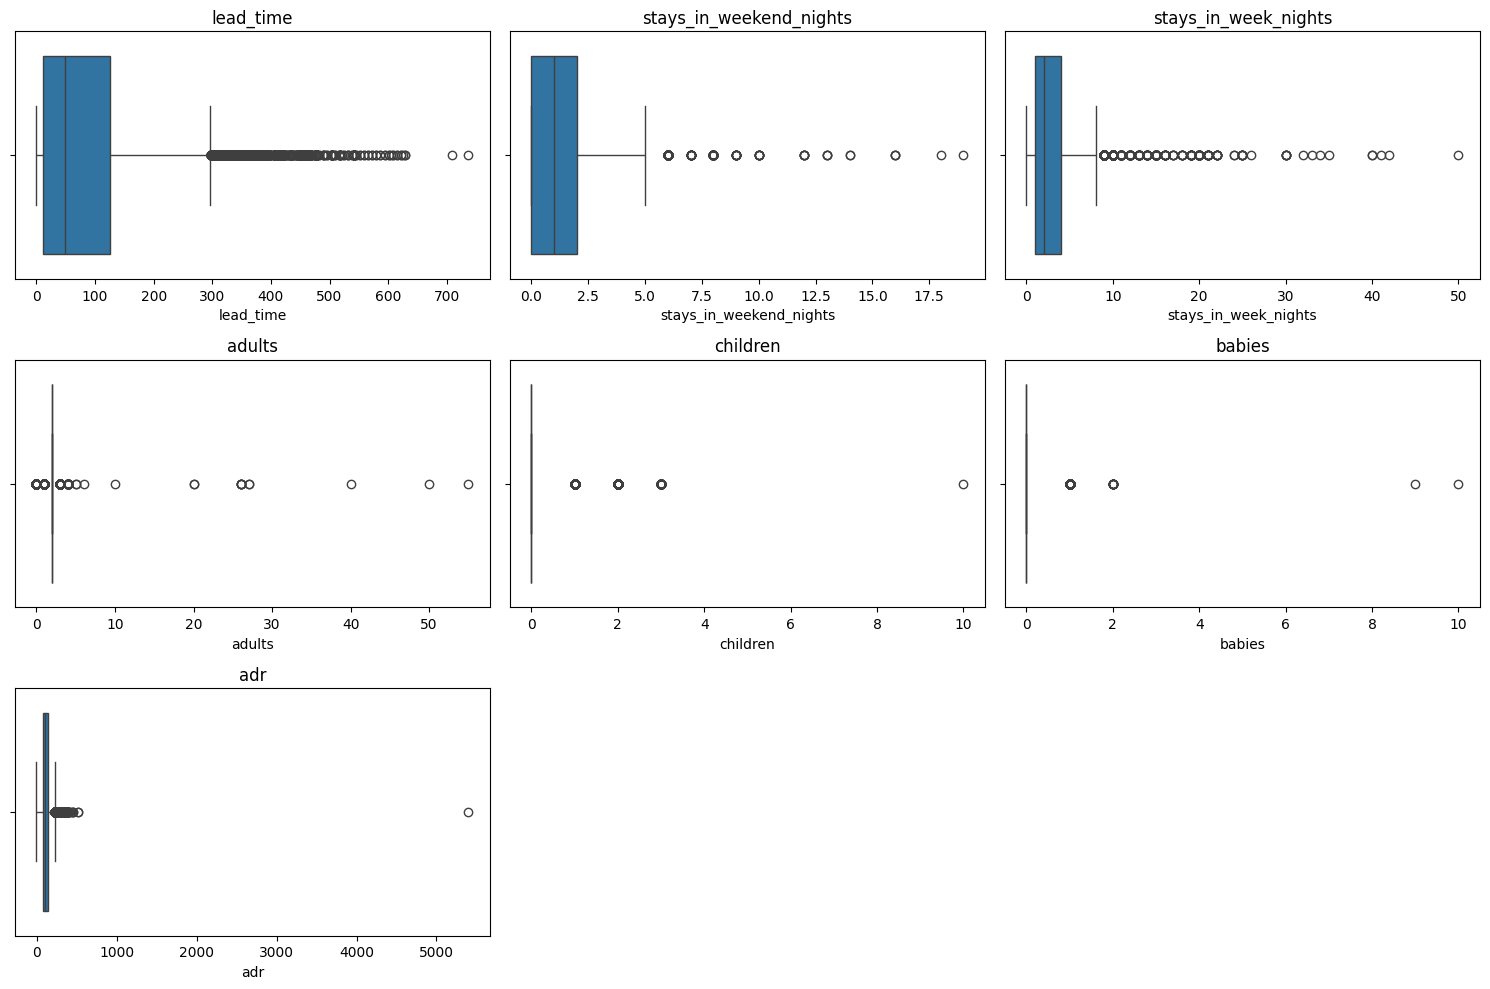

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'adr']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [29]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['adr'] >= lower) & (df['adr'] <= upper)]

In [30]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())

In [35]:
# Create arrival_date column
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), format='%Y-%B-%d')

In [34]:
print(df['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [36]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df = df[df['total_guests'] > 0]

In [37]:
print("Max ADR:", df['adr'].max())
print("Max lead_time:", df['lead_time'].max())
print("Adults <= 0:", (df['adults'] <= 0).sum())

Max ADR: 218.33
Max lead_time: 737
Adults <= 0: 219


In [38]:
df = df[(df['adults'] + df['children'] + df['babies']) > 0]

In [39]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))
print(df['arrival_date'].min(), df['arrival_date'].max())


2015-07-01 00:00:00 2017-08-31 00:00:00


In [40]:
df.to_csv('hotel_bookings_cleaned.csv', index=False)